**Tech Challenge - Fase 01**

Guilherme Augusto da Silva

RM354300

In [ ]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

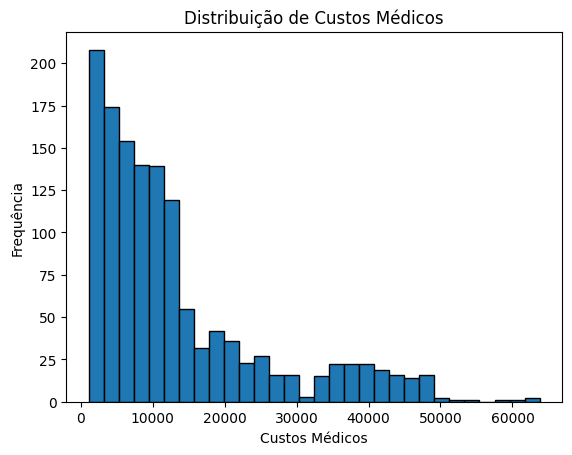

In [ ]:
import matplotlib.pyplot as plt

df['charges'].plot.hist(bins=30, edgecolor='black')
plt.title('Distribuição de Custos Médicos')
plt.xlabel('Custos Médicos')
plt.ylabel('Frequência')
plt.show()

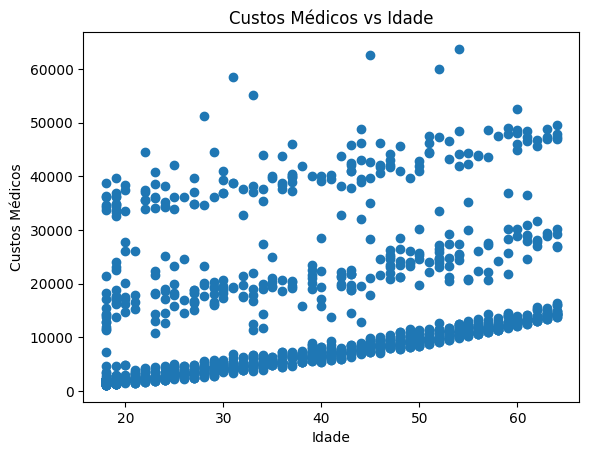

In [ ]:
plt.scatter(df['age'], df['charges'])
plt.title('Custos Médicos vs Idade')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.show()

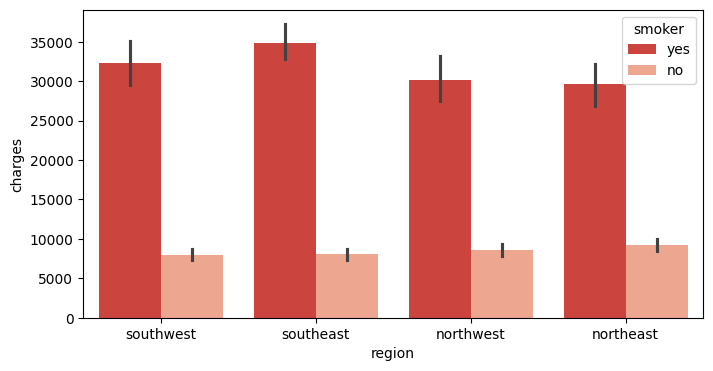

In [ ]:
f, ax = plt.subplots(1,1, figsize=(8,4))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker', data=df, palette='Reds_r')

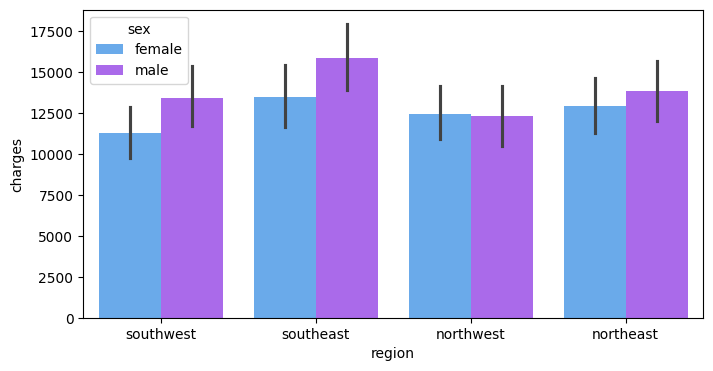

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

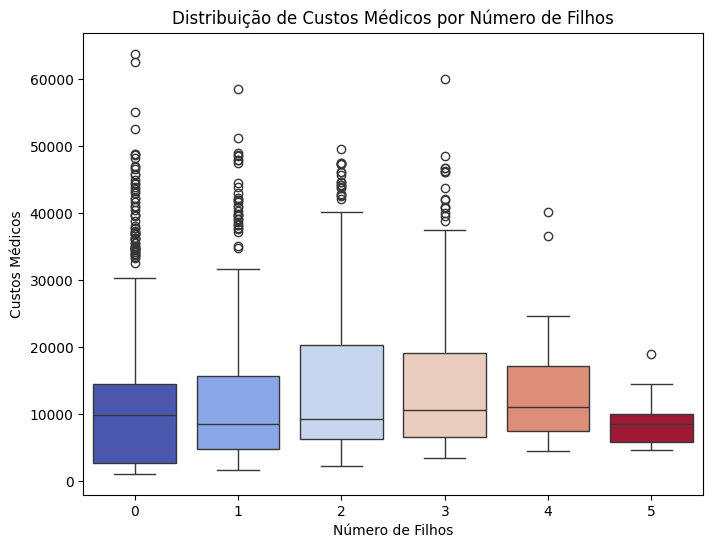

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='charges', hue='children', data=df, palette='coolwarm', legend=False)
plt.title('Distribuição de Custos Médicos por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Custos Médicos')
plt.show()

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns = ['sex', 'smoker', 'region']
for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


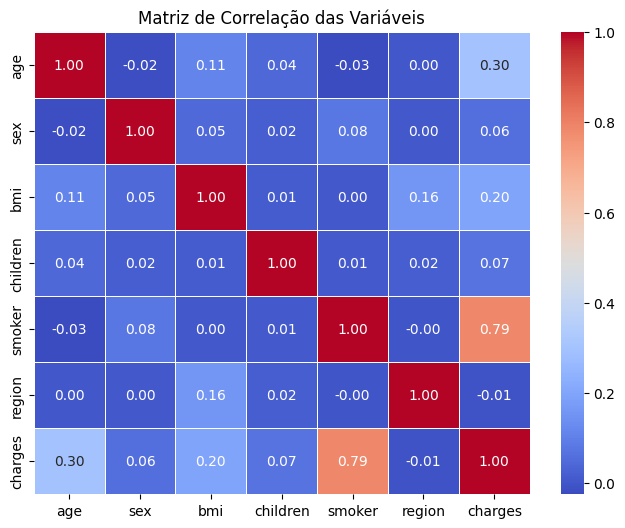

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Matriz de Correlação das Variáveis')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)


Erro Quadrático Médio (MSE): 33635210.431178406
Coeficiente de Determinação (R²): 0.7833463107364539


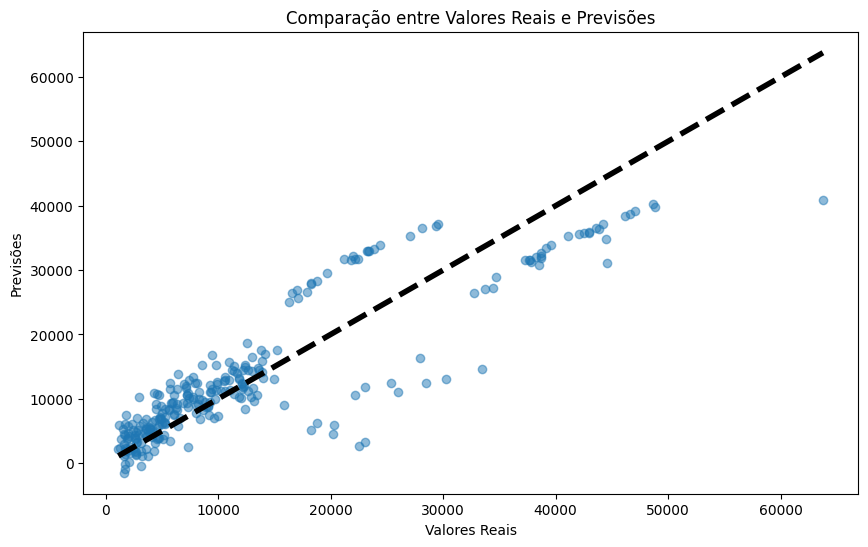

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Comparação entre Valores Reais e Previsões')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", r2)



Erro Quadrático Médio (MSE): 49003243.60682007
Coeficiente de Determinação (R²): 0.6843565603663775
